In [1]:
#Import all of the necessary packages
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from IPython.html.widgets import interact, fixed
import ipywidgets as widgets

import io

font_plt = {'family': 'serif',
            'color':  'darkred',
            'weight': 'normal',
            'size': 10,
            }
font_plt_ax = {'family': 'serif',
               'color':  'black',
               'weight': 'normal',
               'size': 10,
              }
import sys
import glob #glob is helpful for searching for filenames or directories
import ddm_clean as ddm #this is the module containing the differential dynamic microscopy code
import scipy #scientific python
from scipy.signal import blackmanharris as bh #for Blackman-Harris windowing
import pickle #for saving data

import mpld3

C:\Users\Physics\Anaconda3\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)
tiff_file.py:1995: UserWarning: failed to import _tifffile.decodepackbits
  warnings.warn("failed to import %s" % module_function)
tiff_file.py:1995: UserWarning: failed to import _tifffile.decodelzw
  warnings.warn("failed to import %s" % module_function)
tiff_file.py:1995: UserWarning: failed to import _tifffile.unpackints
  warnings.warn("failed to import %s" % module_function)


In [213]:
dts = ddm.genLogDist(1,2998,400)

In [355]:
Sample2 = ['0.02mgmlDNA_Buffer_17.5fps_55exp_8000frames', '0.02mgmlDNA_Buffer_49fps_20exp_8000frames','0.02mgmlDNA_Buffer_99fps_10exp_8000frames','0.02mgmlDNA_Buffer_99fps_10exp']
Sample = ['allResults_0.02mgmlDNA_CoNetwork_29fps_34exp'] 

In [289]:
# different ROIs and the video number, change samNumber based upon the number of videos taken for the condition
samNumber = ['1','2','3','4','5','6','7','8']
#newtaus = np.zeros([len(samNumber),31])
#newtaustds = np.zeros([len(samNumber),31])

In [356]:
Round2_Results = {}

In [357]:
newt = lambda t,s: (1./s)*gamma(1./s)*t
framerate = 29.0
px = 0.189
imDimension = 128
q = np.arange(0,imDimension/2)*2*np.pi*(1./(imDimension*px))
times = dts/framerate

In [398]:
num = 0
ss = 5

In [399]:
#Load in the allResults file  
data_dir = "D:\\2018-07-11_videos\\allResults\\"
data_file = Sample[num]+"_"+samNumber[ss]+".p"

Ana_data = pickle.load(open(data_dir + data_file, 'r'))

In [400]:
#Round2_Results.keys()

(0.9, 15)

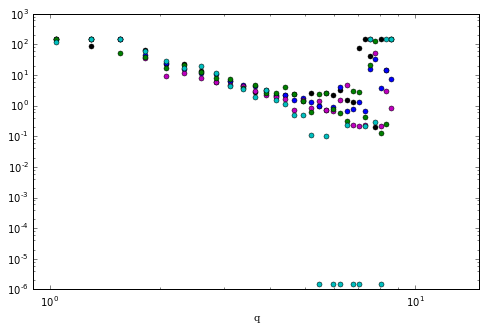

In [407]:
%matplotlib inline
mpld3.enable_notebook()
V = ['top', 'bottom']
z = 1
ROI = [ '256', '384','512', '640','768']
#This will plot all of the q vs tau for all of the ROIs in the   
tau = np.zeros([len(ROI),63]) #decay time
amp = np.zeros_like(tau) #amplitude
bg = np.zeros_like(tau) #background
alph = np.zeros_like(tau) #alpha (stretching exponent)
chi2 = np.zeros_like(tau)
#fitparams = np.zeros([63,7])
for i in range(len(ROI)):
    fitparams = Ana_data['fitparams'+ROI[i]]
    tau[i,:] = fitparams[:,1]
    amp[i,:] = fitparams[:,0]
    bg[i,:] = fitparams[:,2]
    alph[i,:] = fitparams[:,3]

fig = plt.figure(figsize=(8,8/1.618)); ax = fig.gca(); 
ax.set_xlabel("q", fontdict=font_plt_ax)

nt = np.zeros([len(ROI),31])
cols = ['ko','bo','mo','go','co','yo','ro','gv','bv','mv']
for i in range(len(ROI)):
    nt[i] = ddm.newt(tau[i,2:-30], alph[i,2:-30])
    ax.loglog(q[3:-30], ddm.newt(tau[i,2:-30],alph[i,2:-30]), cols[i], ms= 5.0)

ntav = np.mean(nt, axis=0)
ntstd = np.std(nt,axis=0)

#ax.loglog(q[3:-30], ntav, 'rv')
ax.set_xlim(0.9,15)

In [408]:
Round2_Results['newTaus_ROIs'+Sample[num]+'_'+samNumber[ss]+'_no896'] = ntav
Round2_Results['newTausSTD_ROIs'+Sample[num]+'_'+samNumber[ss]+'_no896'] = ntstd

In [421]:
ntav.shape

(31L,)

In [217]:
R1 = np.zeros([len(ROI),2])
R2 = np.zeros([len(ROI),2])

In [130]:
Round2_Results.keys()

['newTaus_ROIsallResults_0.02mgmlDNA_ActinNetwork_29fps_34exp_6_top',
 'newTausSTD_ROIsallResults_0.02mgmlDNA_ActinNetwork_29fps_34exp_2_top',
 'newTaus_ROIsallResults_0.02mgmlDNA_ActinNetwork_29fps_34exp_6_bottom',
 'newTausSTD_ROIsallResults_0.02mgmlDNA_ActinNetwork_29fps_34exp_4_top',
 'newTaus_ROIsallResults_0.02mgmlDNA_ActinNetwork_29fps_34exp_1_bottom',
 'newTausSTD_ROIsallResults_0.02mgmlDNA_ActinNetwork_29fps_34exp_1_bottom',
 'newTausSTD_ROIsallResults_0.02mgmlDNA_ActinNetwork_29fps_34exp_8_bottom',
 'newTausSTD_ROIsallResults_0.02mgmlDNA_ActinNetwork_29fps_34exp_1_top',
 'newTaus_ROIsallResults_0.02mgmlDNA_ActinNetwork_29fps_34exp_2_bottom',
 'newTaus_ROIsallResults_0.02mgmlDNA_ActinNetwork_29fps_34exp_2_top',
 'newTausSTD_ROIsallResults_0.02mgmlDNA_ActinNetwork_29fps_34exp_2_bottom',
 'newTausSTD_ROIsallResults_0.02mgmlDNA_ActinNetwork_29fps_34exp_7_bottom',
 'newTausSTD_ROIsallResults_0.02mgmlDNA_ActinNetwork_29fps_34exp_6_bottom',
 'newTaus_ROIsallResults_0.02mgmlDNA_Actin

In [518]:
#ToKeep.keys()

In [409]:
pickle.dump(Round2_Results, open('Z:\\Devynn_Summer2018\\Data\\AllData_Results\\Round2_Results_CoConditions_withoutDiffCoeffs_all.p','wb'))

After averaging each of the ROIs: average together the videos and get a diffusion coefficient for each video and then for the average

In [519]:
Condition = pickle.load(open('Z:\\Devynn_Summer2018\\Data\\AllData_Results\\Round2_Results_ActinConditions_withoutDiffCoeffs_all.p','rb'))
Smps = ['allResults_0.02mgmlDNA_CoNetwork_29fps_34exp','allResults_0.02mgmlDNA_MTNetwork_29fps_34exp','allResults_0.02mgmlDNA_ActinNetwork_29fps_34exp']

In [520]:
Condition.keys()

['newTaus_ROIsallResults_0.02mgmlDNA_ActinNetwork_29fps_34exp_2_top',
 'newTausSTD_ROIsallResults_0.02mgmlDNA_ActinNetwork_29fps_34exp_1_bottom',
 'newTausSTD_ROIsallResults_0.02mgmlDNA_ActinNetwork_29fps_34exp_2_bottom',
 'newTaus_ROIsallResults_0.02mgmlDNA_ActinNetwork_29fps_34exp_6_top',
 'newTaus_ROIsallResults_0.02mgmlDNA_ActinNetwork_29fps_34exp_4_top',
 'newTausSTD_ROIsallResults_0.02mgmlDNA_ActinNetwork_29fps_34exp_2_top',
 'newTaus_ROIsallResults_0.02mgmlDNA_ActinNetwork_29fps_34exp_8_bottom',
 'newTausSTD_ROIsallResults_0.02mgmlDNA_ActinNetwork_29fps_34exp_1_top',
 'newTaus_ROIsallResults_0.02mgmlDNA_ActinNetwork_29fps_34exp_8_top',
 'newTausSTD_ROIsallResults_0.02mgmlDNA_ActinNetwork_29fps_34exp_6_bottom',
 'newTausSTD_ROIsallResults_0.02mgmlDNA_ActinNetwork_29fps_34exp_4_top',
 'newTausSTD_ROIsallResults_0.02mgmlDNA_ActinNetwork_29fps_34exp_8_top',
 'newTaus_ROIsallResults_0.02mgmlDNA_ActinNetwork_29fps_34exp_7_top',
 'newTausSTD_ROIsallResults_0.02mgmlDNA_ActinNetwork_29fp

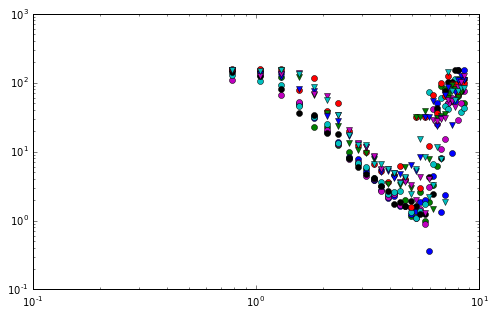

In [524]:
samNumber = ['1_top','1_bottom','2_top','2_bottom','4_top','6_top','6_bottom','7_top','8_top','8_bottom']
theone = 2
tau = np.zeros([len(samNumber),31])
fig = plt.figure(figsize=(8,8/1.618)); ax = fig.gca();
col = ['go', 'bo', 'mo', 'co','ko', 'ro','gv','bv','mv','cv','kv','rv']
for i in range(len(samNumber)):
    tau[i] = Condition['newTaus_ROIs'+Smps[theone]+'_'+samNumber[i]]
    std = Condition['newTausSTD_ROIs'+Smps[theone]+'_'+samNumber[i]]
    ax.loglog(q[3:-30],tau[i], col[i])
tauAVG = np.mean(tau,axis=0)
tauSTD = np.std(tau,axis=0)

In [530]:
def DiffCoef (newtau_average, StretchExp, qrange, qmin, qmax):
    nt = newtau_average
    indx = (qrange>qmin) & (qrange<qmax)
    ds = (qrange[indx]**-2) / nt[indx]
    return ds.mean(), indx

def Diff_Fit(qrange, taurange, qmin, qmax, StExp, slope):
    step1 = DiffCoef(taurange, StExp, qrange, qmin, qmax)
    fit1 = (1./step1[0]) * 1./(qrange**slope)
    return fit1, step1[0], step1[1]

#Need to fix the function so the it will fit the data

#define a function to plot the results

def plot_results(qmin = q[2], qmax = q[10], slope = 2.0):
    qs = q[3:-30]
    fig,ax = plt.subplots(figsize=(8,8/1.618))
    ax.loglog(qs, tauAVG, 'ro')
    #ax.errorbar(np.log(qs),np.log(tauAVG), yerr = tauSTD, xerr = None, fmt = 'ro')
    fits = Diff_Fit(qs, tauAVG, qmin, qmax, alph[2:-30], slope)
    ax.loglog(qs,fits[0],'-k')
    #ax.plot(np.log(qs), np.log(fits[0]),  '-k')
    #ax.set_ylim(-2.0,10)
    ax.text(0.55,0.8,'D = %.3f' %fits[1], 
        fontdict=font_plt,horizontalalignment='left', 
        verticalalignment='center', transform=ax.transAxes)
    ax.text(0.55,0.77,'slope = %.2f' %slope, 
        fontdict=font_plt,horizontalalignment='left', 
        verticalalignment='center', transform=ax.transAxes)
    ax.set_ylabel(" Tau", fontdict=font_plt_ax)

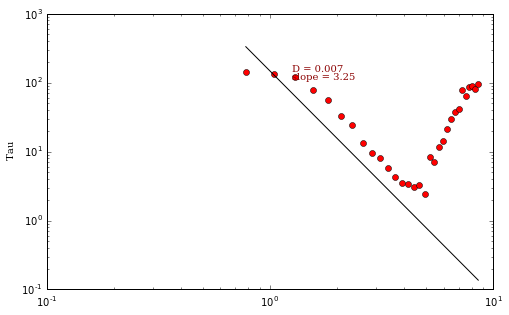

In [531]:
#fit to the high q region
interact(plot_results, qmin = (q[0], q[10]), qmax = (q[5], q[20]), slope = (2.0,4.5,0.05), continuous_update=False)

In [534]:
pickle.dump(ToKeep, open('Z:\\Devynn_Summer2018\\Data\\AllData_Results\\ToKeep_maybeallbad.p', 'wb'))

In [527]:
DiffCoef_average1 = 0.016
DiffCoef_averageAlpha1 = 2/2.00

In [494]:
DC = np.zeros(len(samNumber))
Sa = np.zeros(len(samNumber))

In [495]:
def plot_resultsall(qmin = q[2], qmax = q[10], slope = 2.0):
    qs = q[3:-30]
    tau = Condition['newTaus_ROIs'+Smps[theone]+'_'+samNumber[chg]]
    std = Condition['newTausSTD_ROIs'+Smps[theone]+'_'+samNumber[chg]]
    fig,ax = plt.subplots(figsize=(8,8/1.618))
    ax.errorbar(np.log(qs),np.log(tau), yerr = std, xerr = None, fmt = 'ro')
    fits = Diff_Fit(qs, tau, qmin, qmax, alph[2:-30], slope)
    ax.plot(np.log(qs), np.log(fits[0]),  '-k')
    ax.set_ylim(-2.0,10)
    ax.text(0.55,0.8,'D = %.3f' %fits[1], 
        fontdict=font_plt,horizontalalignment='left', 
        verticalalignment='center', transform=ax.transAxes)
    ax.text(0.55,0.77,'slope = %.2f' %slope, 
        fontdict=font_plt,horizontalalignment='left', 
        verticalalignment='center', transform=ax.transAxes)
    ax.set_ylabel(" Tau", fontdict=font_plt_ax)
    ax.set_xlabel(" q", fontdict=font_plt_ax)
    ax.set_title(Smps[theone]+'_'+samNumber[chg], fontdict=font_plt_ax)

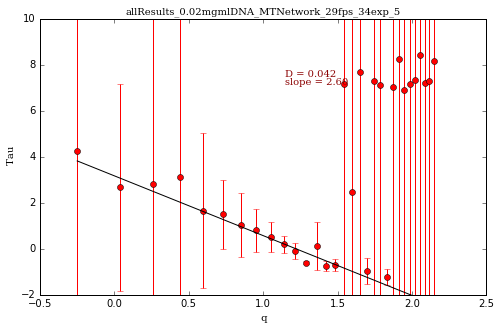

In [505]:
#fit for each video used in the average to get a standard deviation
chg = 4
interact(plot_resultsall, qmin = (q[0], q[10]), qmax = (q[5], q[20]), slope = (2.0,4.5,0.05), continuous_update=False)

In [506]:
DC[chg] = 0.042
Sa[chg] = 2/2.60 #this is alpha = 2/slope

In [509]:
AlSTD = np.std(Sa, axis=0)
DCstd = np.std(DC,axis=0)
Alavg = np.mean(Sa, axis=0)
DCavg = np.mean(DC,axis=0)
AlSTD, DCstd, Alavg, DCavg

(0.085131546528964111,
 0.012727922061357855,
 0.87765567765567776,
 0.042999999999999997)

In [516]:
ToKeep['DiffCoef_'+Smps[theone]] = DiffCoef_average
ToKeep['DiffCoef_fromAVG_'+Smps[theone]] = DCavg
ToKeep['DiffCoefSTD_'+Smps[theone]] = DCstd
ToKeep['Alpha_'+Smps[theone]] = DiffCoef_averageAlpha
ToKeep['Alpha_fromAVG_'+Smps[theone]] = Alavg
ToKeep['AlphaSTD_'+Smps[theone]] = AlSTD
ToKeep['TauAverage_'+Smps[theone]] = tauAVG
ToKeep['TauSTD_'+Smps[theone]] = tauSTD